In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pprint
import datetime
from scipy import stats
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
df = pd.read_csv ('Resources/GeneralEsportData.csv')
df

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,190262.81,156839.89,255,96
1,Age of Empires II,1999,Strategy,1949008.74,619582.87,1357,989
2,Age of Empires III,2005,Strategy,68613.85,41500.00,108,77
3,Age of Empires Online,2011,Strategy,4078.56,0.00,19,12
4,Age of Mythology,2002,Strategy,52360.00,52000.00,22,6
...,...,...,...,...,...,...,...
530,Gears of War: Ultimate Edition,2015,Third-Person Shooter,170000.00,170000.00,39,3
531,Knockout City,2021,Third-Person Shooter,0.00,0.00,0,0
532,Mobile Suit Gundam: Extreme Vs Maxi Boost ON,2016,Third-Person Shooter,100.00,0.00,6,1
533,Rogue Company,2020,Third-Person Shooter,50000.00,0.00,48,2


In [3]:
genre_totals_df= df
genre_totals_df[['TotalTournaments']] = genre_totals_df[['TotalTournaments']].astype(float)
genre_totals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              535 non-null    object 
 1   ReleaseDate       535 non-null    int64  
 2   Genre             535 non-null    object 
 3   TotalEarnings     535 non-null    float64
 4   OnlineEarnings    535 non-null    float64
 5   TotalPlayers      535 non-null    int64  
 6   TotalTournaments  535 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 29.4+ KB


In [43]:
genre_totals_df= genre_totals_df.drop('OnlineEarnings', 1)
genre_totals_df = genre_totals_df[genre_totals_df['TotalEarnings'] > 0.0]
#genre_totals_df[['ReleaseDate']] = genre_totals_df[['ReleaseDate']].astype(int)
genre_totals_df['Result'] = genre_totals_df['TotalEarnings']/genre_totals_df['TotalTournaments']

genre_totals_df.info()

KeyError: "['OnlineEarnings'] not found in axis"

In [44]:
Strategy_df=genre_totals_df.loc[genre_totals_df['Genre']=='Strategy']

First_Person_Shooter_df=genre_totals_df.loc[genre_totals_df['Genre']=='First-Person Shooter']

Multiplayer_Online_Battle_Arena_df=genre_totals_df.loc[genre_totals_df['Genre']=='Multiplayer Online Battle Arena']

Role_Playing_Game_df=genre_totals_df.loc[genre_totals_df['Genre']=='Role-Playing Game']

Fighting_Game_df=genre_totals_df.loc[genre_totals_df['Genre']=='Fighting Game']

Racing_df=genre_totals_df.loc[genre_totals_df['Genre']=='Racing']

Sports_df=genre_totals_df.loc[genre_totals_df['Genre']=='Sports']

Collectible_Card_Game_df=genre_totals_df.loc[genre_totals_df['Genre']=='Collectible Card Game']

Puzzle_Game_df=genre_totals_df.loc[genre_totals_df['Genre']=='Puzzle Game']

Battle_Royale_df=genre_totals_df.loc[genre_totals_df['Genre']=='Battle Royale']

Third_Person_Shooter_df=genre_totals_df.loc[genre_totals_df['Genre']=='Third-Person Shooter']

Multiplayer_Online_Battle_Arena_df



,Game,ReleaseDate,Genre,TotalEarnings,TotalPlayers,TotalTournaments,Result
158,Arena of Valor,2015,Multiplayer Online Battle Arena,2.656149e+07,708,63.0,421610.885714
159,Battlerite,2016,Multiplayer Online Battle Arena,6.517345e+04,86,75.0,868.979333
160,Bloodline Champions,2011,Multiplayer Online Battle Arena,4.190532e+04,43,12.0,3492.110000
161,Creative Destruction,2018,Multiplayer Online Battle Arena,1.000000e+05,8,1.0,100000.000000
162,Defense of the Ancients,2003,Multiplayer Online Battle Arena,8.574207e+05,468,94.0,9121.496277
164,Dota 2,2013,Multiplayer Online Battle Arena,2.347956e+08,4059,1526.0,153863.401835
165,Heavy Metal Machines,2017,Multiplayer Online Battle Arena,1.233933e+04,35,1.0,12339.330000
166,Heroes of Newerth,2010,Multiplayer Online Battle Arena,2.918707e+06,813,371.0,7867.133585
167,Heroes of the Storm,2015,Multiplayer Online Battle Arena,1.819348e+07,1256,476.0,38221.602206
168,Hyper Scape,2020,Multiplayer Online Battle Arena,2.990000e+05,260,4.0,74750.000000


In [48]:
x=Multiplayer_Online_Battle_Arena_df['ReleaseDate']
y=Multiplayer_Online_Battle_Arena_df['Result']
Genre=pd.unique(Multiplayer_Online_Battle_Arena_df['Genre'])

#print(x)

In [46]:
res = stats.linregress(x, y)
Trend=f"R-squared: {res.rvalue**2:.6f}"


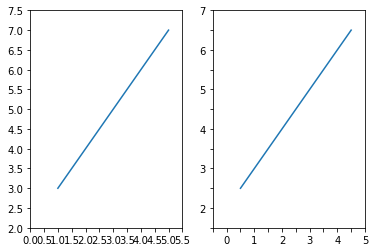

In [42]:
fig, (ax1, ax2) = plt.subplots(1,2)

x1, x2 = 1, 5
y1, y2 = 3, 7

# first axis: ticks spaced at 0.5
ax1.plot([x1, x2], [y1, y2])
ax1.set_xticks(np.arange(x1-1, x2+1, 0.5))
ax1.set_yticks(np.arange(y1-1, y2+1, 0.5))

# second axis: tick labels will be replaced
ax2.plot([x1, x2], [y1, y2])

ax2.set_yticks(np.arange(y1-1, y2+1, 0.5))

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()

# new x ticks  '1'->'', '1.5'->'1', '2'->'', '2.5'->'2' etc.
labels = [item.get_text() for item in ax2.get_xticklabels()]
ax2.set_xticks(np.arange(x1-1, x2+1, 0.5))
new_labels = [ "%d" % int(float(l)) if '.5' in l else '' for l in labels]
ax2.set_xticklabels(new_labels)

# new y ticks
labels = [item.get_text() for item in ax2.get_yticklabels()]
new_labels = [ "%d" % int(float(l)) if '.5' in l else '' for l in labels]
ax2.set_yticklabels(new_labels)

fig.canvas.draw()
plt.show()

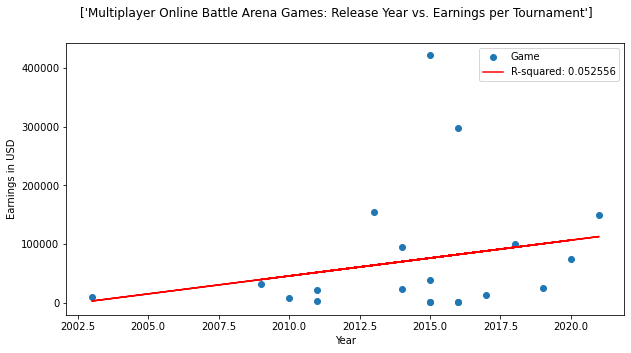

In [50]:
fig = plt.figure(figsize=(10,5))
ax.set_xticks(np.arange(x1-1, x2+1, 0.5))
labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = [ "%d" % int(float(l)) if '.5' in l else '' for l in labels]
ax.set_xticklabels(new_labels)
plt.plot(x, y, 'o', label='Game')
plt.plot(x, int(res.intercept) + int(res.slope)*x, 'r', label=str(Trend))
plt.legend()
fig.suptitle(Genre+' Games: Release Year vs. Earnings per Tournament')
plt.xlabel('Year')
plt.ylabel('Earnings in USD')


plt.show()